<a href="https://colab.research.google.com/github/uganjha/greatlearning/blob/master/Image_Number_Classifier_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from sklearn import metrics
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [4]:
ls drive/MyDrive

 1/
 372359_Aug.pdf
 372359_July.pdf
 372359_June.pdf
 372359_May.pdf
 372359_Oct.pdf
 372359_sep.pdf
 914010046759574-12-11-2018to11-11-2019.pdf
 Aadhaar.jpg
'Autonomous_Vehicles_SVHN_single_grey1 (1).h5'
 Autonomous_Vehicles_SVHN_single_grey1.h5
 chkAndWrite.scala
'Colab Notebooks'/
'Composite Credit Information.doc'
 contacs.vcf
'Copy of Registration Form - templates.gsheet'
 EAadhaar_943203437356_11112019154646_381887.pdf
 EAadhaar_xxxxxxxx7356_11112019154150_368525.pdf
 epfo.pdf
 FaceRec.rar
'Final Project Report all pages.docx'
'Final Project Report all pages.docx.gdoc'
 generictest.scala
 github-recovery-codes.txt
 historage.sh
 HoldScript.zip
 HouseTax_201617.pdf
'HouseTax_201920_H1_Receipt_192883357_28_09_2019 (1).pdf'
 HouseTax_201920_H1_Receipt_192883357_28_09_2019.pdf
'Housing loan appn form.doc'
'Housing loan appn form.pdf'
 IDBI-Loan-Sanction-Letter.pdf
 ieeedocformatproject.doc
 ieeedocformatproject.doc.gdoc
'IMG_1600 ugan.JPG'
 important.zip
 Income_tax_doc_12BB.pdf
 in

In [5]:
fileLocation =  'drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5'


In [6]:
ls $fileLocation

drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5


In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd



import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import LeakyReLU
import h5py
from sklearn import metrics

In [8]:
data = h5py.File(fileLocation, 'r')

In [9]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [10]:
X_test,X_train,X_val,y_test,y_train,y_val = data.values()

In [11]:
X_test = X_test.value
X_train = X_train.value
y_test = y_test.value
y_train = y_train.value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


In [12]:
X_test.shape

(18000, 32, 32)

In [13]:
X_train.shape

(42000, 32, 32)

In [14]:
X_val.shape

(60000, 32, 32)

In [15]:
y_train.shape

(42000,)

In [16]:
y_test.shape

(18000,)

In [17]:
y_test[0]

1

In [18]:
y_val[2]

0

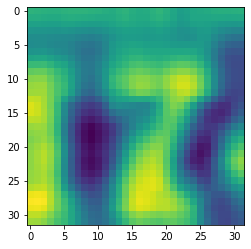

In [19]:
plt.imshow(X_test[1])

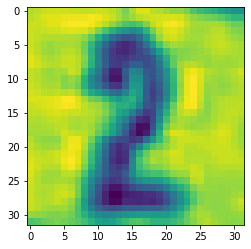

In [20]:
plt.imshow(X_test[2])

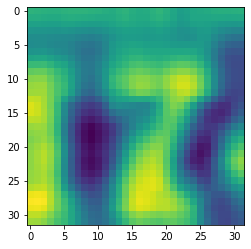

In [21]:
plt.imshow(X_test[1])

In [22]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
def getAnnModal(numClasses):
  model = Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(32, 32)))    #flattens the 28X28 image into 784 element array

  model.add(Dense(784, activation='relu', input_shape=(1024,)))
  model.add(Dense(256, activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

        
          

  for l in model.layers:
      print (l.name, l.input_shape,'==>',l.output_shape)
  print()
  print (model.summary())
  return model

In [25]:
num_classes = y_train.shape[1]
model = getAnnModal(num_classes)

flatten (None, 32, 32) ==> (None, 1024)
dense (None, 1024) ==> (None, 784)
dense_1 (None, 784) ==> (None, 256)
dense_2 (None, 256) ==> (None, 10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 784)               803600    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,007,130
Trainable params: 1,007,130
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
epochs = 20
model.compile(loss='categorical_crossentropy',  optimizer='sgd' ,  metrics=['accuracy'] , )

In [27]:
X_test.shape

(18000, 32, 32)

In [28]:

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=500 )

# , callbacks=callback_list

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
84/84 [==============================] - 6s 62ms/step - loss: 2.3121 - accuracy: 0.1094 - val_loss: 2.2902 - val_accuracy: 0.1445
Epoch 2/20
84/84 [==============================] - 5s 56ms/step - loss: 2.2885 - accuracy: 0.1403 - val_loss: 2.2789 - val_accuracy: 0.1567
Epoch 3/20
84/84 [==============================] - 5s 57ms/step - loss: 2.2765 - accuracy: 0.1682 - val_loss: 2.2684 - val_accuracy: 0.2088
Epoch 4/20
84/84 [==============================] - 5s 59ms/step - loss: 2.2681 - accuracy: 0.1986 - val_loss: 2.2600 - val_accuracy: 0.2162
Epoch 5/20
84/84 [==============================] - 5s 58ms/step - loss: 2.2581 - accuracy: 0.2159 - val_loss: 2.2504 - val_accuracy: 0.2443
Epoch 6/20
84/84 [==============================] - 5s 58ms/step - loss: 2.2485 - accuracy: 0.2426 - val_loss: 2.2399 - val_accuracy: 0.2716
Epoch 7/20
84/84 [==============================] - 5s 58ms/step - loss: 2.2382 - accuracy: 0.2578 - val_loss: 2.2320 - val_accuracy: 0.2554
Epoch 8/20
84

Model Seems to be undertrained as training and testing accuracy is almost similar and sometime test accuracy is more than training accuracy.Apart from that we have not applied normalization as well.


In [29]:
def getAnnNormalizedModal(numClasses):
  model = Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(32, 32)))    #flattens the 28X28 image into 784 element array
  model.add(BatchNormalization())
  model.add(Dense(784, activation='relu', input_shape=(1024,)))
  model.add(Dense(256, activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

        
          

  for l in model.layers:
      print (l.name, l.input_shape,'==>',l.output_shape)
  print()
  print (model.summary())
  return model


In [ ]:
num_classes = y_train.shape[1]
model = getAnnNormalizedModal(num_classes)
epochs = 40
model.compile(loss='categorical_crossentropy',  optimizer='sgd' ,  metrics=['accuracy'] , )
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=500 )
print(history.history.keys())
#  "Accuracy"

# , callbacks=callback_list

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

flatten_1 (None, 32, 32) ==> (None, 1024)
batch_normalization (None, 1024) ==> (None, 1024)
dense_3 (None, 1024) ==> (None, 784)
dense_4 (None, 784) ==> (None, 256)
dense_5 (None, 256) ==> (None, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               803600    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 1,011,226
Trainable params: 1,009,178

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

It is clear after epoch value of 25 accuracy for testing data started decreasing comparing to test data but accuracy of test data is still increasign so we can increase epoch more .

In [ ]:
num_classes = y_train.shape[1]
model = getAnnNormalizedModal(num_classes)
epochs = 60
model.compile(loss='categorical_crossentropy',  optimizer='sgd' ,  metrics=['accuracy'] , )
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=500 )
print(history.history.keys())
#  "Accuracy"

# , callbacks=callback_list

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

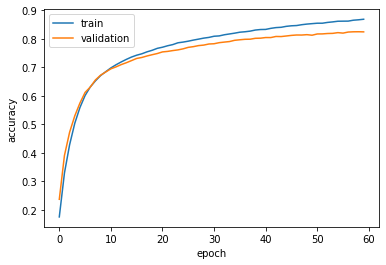

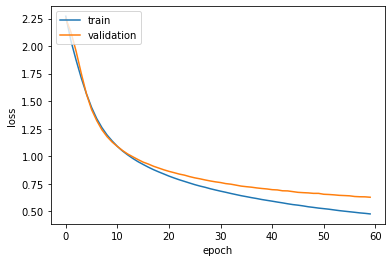

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()